In [63]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

scratch = os.environ.get("PSCRATCH")+"/xrb_layered/"

mpl.rcParams.update({

    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    # Non-italic math
    "mathtext.default": "regular",
    # Tick settings
    "xtick.direction" : "in",
    "ytick.direction" : "in",
    "xtick.top" : True,
    "ytick.right" : True,
    # Short dash sign
    "axes.unicode_minus" : True
})

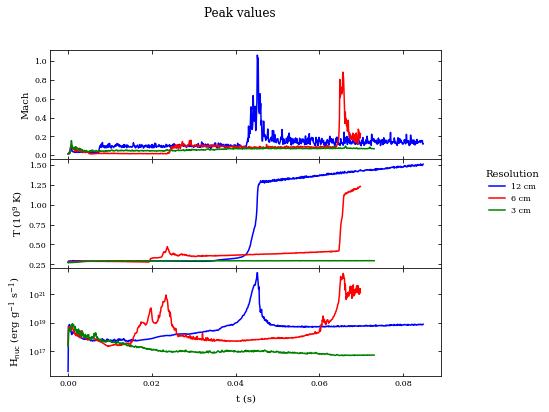

In [64]:
# Extrema

runs = ("RUN3","RUN4","RUN5") # files not in run5 yet
labels = ("12 cm","6 cm","3 cm")
colors = ("b","r","g")

fig,axes = plt.subplots(3,1,sharex=True,figsize=(7,6))
fig.suptitle("Peak values")
fig.subplots_adjust(hspace=0)
axes[0].set_ylabel(r"Mach")
axes[1].set_ylabel(r"$T$ ($10^9$ K)")
axes[2].set_ylabel(r"$H_{\rm nuc}$ (erg g$^{-1}$ s$^{-1}$)")
axes[2].set_xlabel(r"$t$ (s)")

for i,run in enumerate(runs):
    data = np.loadtxt(scratch+run+"/extrema.txt",skiprows=2).T
    t = data[0]
    T_peak = data[2]
    Mach_peak = data[4]
    Hnuc_peak = data[6]

    axes[0].plot(t,Mach_peak, color=colors[i], label=labels[i])
    axes[1].plot(t,T_peak/1e9, color=colors[i])
    axes[2].semilogy(t, Hnuc_peak, color=colors[i])
    
leg = fig.legend(frameon=False, title="Resolution", loc='center right', bbox_to_anchor=(1.01,0.5,0.1,0.1))
fig.savefig("peaks.png", bbox_inches='tight', bbox_extra_artists=(leg,), dpi=500)

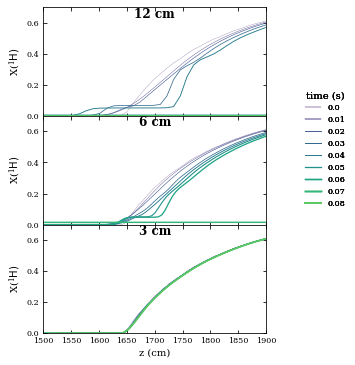

In [65]:
# Averages

fig,axes=plt.subplots(3,1,sharex=True,figsize=(4,6))
fig.subplots_adjust(hspace=0)
for ax in axes:
    ax.set_xlim([1500,1900])
    ax.set_ylim([0,0.7])
    ax.set_ylabel(r"$X(^1\rm{H})$")
axes[-1].set_xlabel(r"z (cm)")

# times to check
tcheck = np.arange(0.00,0.11,0.01)

cmap = sns.color_palette('viridis', len(tcheck))
linewidths = np.linspace(0.2,2,len(tcheck))


for i,run in enumerate(runs):
    # print(run)
    models,times = np.genfromtxt(scratch+run+"/times.txt" ,dtype='unicode', delimiter='    ', unpack=True)
                                 #, converters={0:(lambda x: x.split("/")[-1])}) doesnt work, needs byte-like and not str
    
    # conversion
    models = [m.split("/")[-1] for m in models]
    times  = [float(t) for t in times]
    # print(models)
    # print(times)
    
    for j,t0 in enumerate(tcheck):
        if t0>times[-1]:
            break
            
        # Get averages for model at closest time to check time
        k = np.argmin(abs(times-t0))
        file = scratch+run+"/PLOTS/"+models[k]+"/averages"
        
        try:
            header = np.loadtxt(file, dtype='unicode', max_rows=1)
            data = np.loadtxt(file, skiprows=1).T
        except:
            print("average file not found for plotfile ",file)

        z = data[0]
        # Hnuc = data[list(header).index('Hnuc')]
        h1 = data[list(header).index('X(h1)')]
        
        axes[i].plot(z, h1, '-', color=cmap[j], lw=linewidths[j], label=np.round(t0,decimals=2) if i==0 else None)
        # axb.plot(z,np.log10(Hnuc), color=cmap[j], ls='--')
        
        axes[i].set_title(labels[i], fontweight='bold', y=0.85)
        
        
    leg = fig.legend(title="time (s)", frameon=False, loc='center right', bbox_to_anchor=(1.1,0.5,0.1,0.1))

fig.savefig("h1_layer.png", bbox_inches='tight', bbox_extra_artists=(leg,),  dpi=500)

In [74]:
run_dir = scratch + "RUN13/"


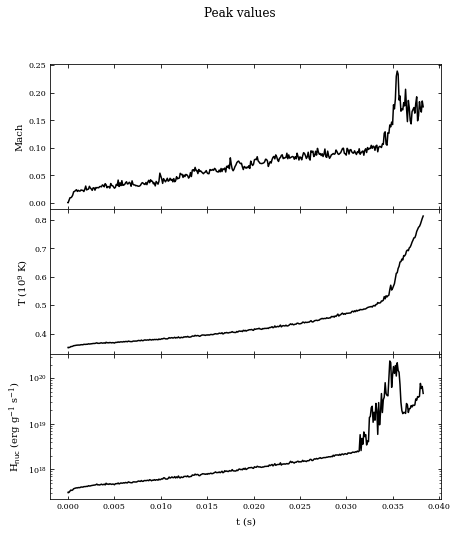

In [79]:
# Extrema

fig,axes = plt.subplots(3,1,sharex=True,figsize=(7,8))
fig.suptitle("Peak values")
fig.subplots_adjust(hspace=0)
axes[0].set_ylabel(r"Mach")
axes[1].set_ylabel(r"$T$ ($10^9$ K)")
axes[2].set_ylabel(r"$H_{\rm nuc}$ (erg g$^{-1}$ s$^{-1}$)")
axes[2].set_xlabel(r"$t$ (s)")

data = np.loadtxt(run_dir+"/extrema.txt",skiprows=2).T
t = data[0]
T_peak = data[2]
Mach_peak = data[4]
Hnuc_peak = data[6]

axes[0].plot(t,Mach_peak, 'k-')
axes[1].plot(t,T_peak/1e9, 'k-')
axes[2].semilogy(t, Hnuc_peak, 'k-')
    
fig.savefig("peaks.png", bbox_inches='tight', bbox_extra_artists=(leg,), dpi=500)

['height' 'p0' 'tfromp' 'rho' 'Hnuc' 'ad_excess' 'velx' 'vely' 'X(h1)'
 'X(he4)' 'X(c12)' 'X(fe56)']


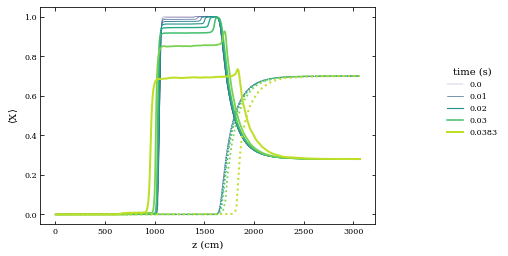

In [66]:
# Post-processing of averages

fig,ax = plt.subplots(1,1)

# times to check
tcheck = np.arange(0,0.04,0.005)

models,times = np.genfromtxt(run_dir+"/times.txt" ,dtype='unicode', delimiter='    ', unpack=True)
# conversion
models = [m.split("/")[-1] for m in models]
times  = [float(t) for t in times]

tcheck = np.append(tcheck, times[-1])
# print(tcheck)

cmap = sns.color_palette('viridis', len(tcheck))
linewidths = np.linspace(0.2,2,len(tcheck))

T,files = [],[]

# # get the top of the convection zone
# ztop = []
# axb = ax.twinx()

# tcheck=[tcheck[-1]]

for j,t0 in enumerate(tcheck):
    # print(t0)
    if t0>times[-1]:
        break

    # Get averages for model at closest time to check time
    k = np.argmin(abs(times-t0))
    file = run_dir+"/PLOTS/"+models[k]+"/averages"
    if file in files:
        # break
        continue
    files.append(file)
    T.append(t0)

    try:
        header = np.loadtxt(file, dtype='unicode', max_rows=1)
        if j==0:
            print(header)
        data = np.loadtxt(file, skiprows=1).T
        z = data[0]
        h1 = data[list(header).index('X(h1)')]
        he4 = data[list(header).index('X(he4)')]
        c12 = data[list(header).index('X(c12)')]
        
        label = None
        if j in (0,len(tcheck)-1) or j in np.arange(0,len(tcheck)-1,2):
            label = np.round(t0,decimals=4)
        
        ax.plot(z, he4, '-', color=cmap[j], lw=linewidths[j], label=label)
        ax.plot(z, h1, ':', color=cmap[j], lw=linewidths[j])
        # ax.plot(z, c12, '-.', color=cmap[j], lw=linewidths[j])


        # ztop.append(z[he4<0.99][-1])
        # ax.plot([ztop[-1]],[he4[he4<0.99][-1]],'.',color=cmap[j])
        
        # grad = np.diff(he4)/np.diff(z)
        # axb.plot(z[1:],grad,lw=0.5)
        # ztop.append(z[::-1][:-1][grad[::-1]<-1e-3][0])
        # ax.plot([ztop[-1]],[he4[z==ztop[-1]]],'.',color=cmap[j])
        
        # ad_excess = data[list(header).index('ad_excess')]
        # axb.plot(z, ad_excess, color=cmap[j], lw=linewidths[j]/2, ls='--')
        
    except Exception as e:
        print(t0)
        print(e)
        print("average file not found for plotfile, or wrong format",file)

        
leg = fig.legend(title="time (s)", frameon=False, loc='center right', bbox_to_anchor=(1.1,0.5,0.1,0.1))
ax.set_xlabel("z (cm)")
# ax.set_ylabel(r"$\langle X(^4\rm{He})\rangle$")
ax.set_ylabel(r"$\langle X\rangle$")

# axb.set_ylim([-0.1,0.1])

fig.savefig("h_he.png", bbox_inches='tight', bbox_extra_artists=(leg,),  dpi=500)

/pscratch/sd/s/simongui/xrb_layered/RUN13/PLOTS/xrb_0156337/convgrad/averages
['height' 'del' 'del_ad' 'del_ledoux']


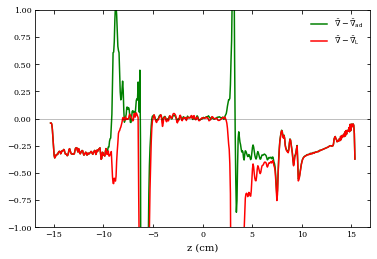

In [71]:
#avg of conv grads

plotfiles = glob.glob(run_dir+"PLOTS/xrb*")
plotfiles = [file for file in plotfiles if "old" not in file]
Nums = [int(file.split("_")[-1]) for file in plotfiles if ("after" not in file and "Init" not in file)]
Nlast = max(Nums)

filename = (run_dir+"PLOTS/xrb_%0.7d/convgrad/averages"%Nlast)
print(filename)
header = np.loadtxt(filename, dtype='unicode', max_rows=1)
print(header)
data = np.loadtxt(filename, skiprows=1).T
z = data[0]
z = (z-z[-1]/2)/100 # center and convert to meters
del_ = data[list(header).index('del')]
del_ad = data[list(header).index('del_ad')]
del_l = data[list(header).index('del_ledoux')]

fig = plt.figure()
plt.xlabel("z (cm)")

# plt.plot(z,del_,label=r'$\bar\nabla$')
# plt.plot(z,del_ad,label=r'$\bar\nabla_{\rm ad}$')
# plt.plot(z,del_l,label=r'$\bar\nabla_{\rm L}$')
# plt.legend()

# # plt.ylim([0,0.6])
# plt.ylim([0.2, 0.5])

plt.plot(z,del_-del_ad,'g-',label=r'$\bar\nabla-\bar\nabla_{\rm ad}$')
plt.plot(z,del_-del_l,'r-',label=r'$\bar\nabla-\bar\nabla_{\rm L}$')
plt.gca().axhline(0,color='k',lw=0.5,alpha=0.5)
plt.legend(frameon=False)

plt.ylim([-1,1])
# plt.ylim([-0.01,0.01])


#compare to del-del_ad calculated by maestro directly (plot_ad_excess)
filename = (run_dir+"PLOTS/xrb_%0.7d/averages"%Nlast)
header = np.loadtxt(filename, dtype='unicode', max_rows=1)
# print(header)
data = np.loadtxt(filename, skiprows=1).T
ad_excess = data[list(header).index('ad_excess')]
# plt.plot(z,ad_excess,'g:',label=r'$\bar{\nabla-\nabla_{\rm ad}}$')


# Detect zero crossing
iswz = np.argwhere(np.logical_and(z > -5 , del_-del_ad < -0.2))[0]
# plt.axvline(z[iswz], color='k', ls=':')
iLed = np.argwhere(np.logical_and(z > -5 , del_-del_l < -0.2))[0]
# plt.axvline(z[iLed], color='k', ls=':')


fig.savefig("dels.png", bbox_inches='tight', bbox_extra_artists=(leg,),  dpi=500)

['height' 'p0' 'tfromp' 'rho' 'Hnuc' 'ad_excess' 'velx' 'vely' 'X(h1)'
 'X(he4)' 'X(c12)' 'X(fe56)']


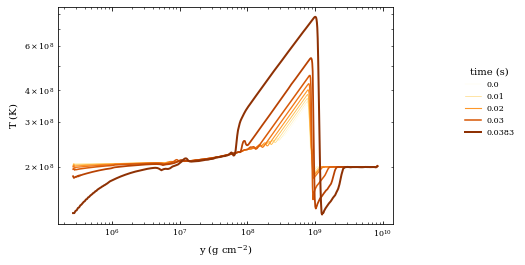

In [80]:
# y-T
fig,ax = plt.subplots(1,1)

# times to check
tcheck = np.arange(0,0.04,0.005)

models,times = np.genfromtxt(run_dir+"/times.txt" ,dtype='unicode', delimiter='    ', unpack=True)
# conversion
models = [m.split("/")[-1] for m in models]
times  = [float(t) for t in times]

tcheck = np.append(tcheck, times[-1])

cmap = sns.color_palette('YlOrBr', len(tcheck))
linewidths = np.linspace(0.2,2,len(tcheck))

T,files = [],[]

# # get the top of the convection zone
# ztop = []
# axb = ax.twinx()

# tcheck=[tcheck[-1]]

for j,t0 in enumerate(tcheck):
    # print(t0)
    if t0>times[-1]:
        break

    # Get averages for model at closest time to check time
    k = np.argmin(abs(times-t0))
    file = run_dir+"/PLOTS/"+models[k]+"/averages"
    if file in files:
        # break
        continue
    files.append(file)
    T.append(t0)

    header = np.loadtxt(file, dtype='unicode', max_rows=1)
    if j==0:
        print(header)
    data = np.loadtxt(file, skiprows=1).T
    z = data[0]
    p = data[list(header).index('p0')]
    y = p/1.29e14
    temp = data[list(header).index('tfromp')]

    label = None
    if j in (0,len(tcheck)-1) or j in np.arange(0,len(tcheck)-1,2):
        label = np.round(t0,decimals=4)

    ax.loglog(y, temp, '-', color=cmap[j], lw=linewidths[j], label=label)

leg = fig.legend(title="time (s)", frameon=False, loc='center right', bbox_to_anchor=(1.1,0.5,0.1,0.1))
ax.set_xlabel(r"y (g cm$^{-2}$)")
# ax.set_ylabel(r"$\langle X(^4\rm{He})\rangle$")
ax.set_ylabel(r"$T$ (K)")

fig.savefig("yT.png", bbox_inches='tight', bbox_extra_artists=(leg,),  dpi=500)